In [99]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from functions import share

In [80]:
fc = pd.read_csv('./data/processed/agg_firm_credit.csv', index_col=['sector', 'account'])
fc.columns = pd.to_datetime(fc.columns)
gdp = pd.read_csv('./data/processed/gdp.csv', index_col=['Unnamed: 0'])

In [81]:
fc_total = pd.DataFrame(fc.loc[('nonfin', slice(None)), :].sum().rename('fc'))
fc_total.index = pd.to_datetime(fc_total.index)

fc_total = pd.DataFrame(fc.loc[('nonfin', slice(None)), :].sum().rename('fc'))
fc_total.index = pd.to_datetime(fc_total.index)

In [82]:
gdp = gdp.T
gdp.index = pd.to_datetime(gdp.index)

In [142]:
# Color Pallettes
Chicago20 = '#141F52'	
Chicago30 = '#1F2E7A'	
Chicago45 = '#2E45B8'
Chicago55 = '#475ED1'	
Chicago90 = '#D6DBF5'	
Chicago95 = '#EBEDFA'
LA85 = '#E1DFD0'

### **Firm Credit to GDP**

In [140]:
credit_to_gdp = pd.DataFrame(fc_total.fc / gdp.gdp, columns=['total'])
credit_to_gdp = pd.concat([credit_to_gdp, 
                           (fc.loc[('nonfin', 'bonds'), :] / gdp.gdp).rename('bonds'), 
                           (fc.loc[('nonfin', 'loans'), :] / gdp.gdp).rename('loans'),
                           (fc.loc[('nonfin', 'govloans'), :] / gdp.gdp).rename('govloans')], axis=1)

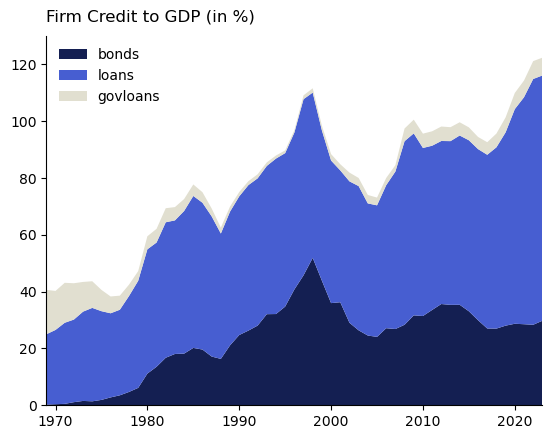

In [143]:
fig, ax = plt.subplots()

ax.stackplot(credit_to_gdp.index, 
             credit_to_gdp.drop(['total'], axis=1).T * 100, 
             labels=['bonds', 'loans', 'govloans'], 
             colors=[Chicago20, Chicago55, LA85])

ax.set_title('Firm Credit to GDP (in %)', loc='left', pad=10)
ax.legend(loc='upper left', framealpha=0)
ax.set_ylim([0, 130])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set(xmargin=0, ymargin=0)

plt.show()

In [144]:
fig.savefig('./figures/firm_credit_to_gdp.png')

### **Sector Shares in Corporate Credit**